In [1]:
import sys
assert sys.version_info >= (3, 5)


import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/yasserh/loan-default-dataset")

Skipping, found downloaded files in "./loan-default-dataset" (use force=True to force download)


In [4]:
my_download= os.path.join("loan-default-dataset", "Loan_Default.csv")
my_dir = os.getcwd()

loans = pd.read_csv(os.path.join(my_dir,my_download))
loans.info

<bound method DataFrame.info of             ID  year loan_limit             Gender approv_in_adv loan_type  \
0        24890  2019         cf  Sex Not Available         nopre     type1   
1        24891  2019         cf               Male         nopre     type2   
2        24892  2019         cf               Male           pre     type1   
3        24893  2019         cf               Male         nopre     type1   
4        24894  2019         cf              Joint           pre     type1   
...        ...   ...        ...                ...           ...       ...   
148665  173555  2019         cf  Sex Not Available         nopre     type1   
148666  173556  2019         cf               Male         nopre     type1   
148667  173557  2019         cf               Male         nopre     type1   
148668  173558  2019         cf             Female         nopre     type1   
148669  173559  2019         cf             Female         nopre     type1   

       loan_purpose Credit_Wort

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
loans.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [7]:
correlations = loans.corr()
correlations

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
ID,1.000000,NaN,-0.000566,0.000442,0.002338,-0.005507,-0.004056,0.000990,0.002535,-0.001036,-0.005853,0.001703,-0.008132
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,-0.377272,0.065556,0.174474,0.734249,0.456065,0.004438,0.038869,-0.036825,0.015029
rate_of_interest,0.000442,NaN,-0.150844,1.000000,0.614908,-0.076473,0.209330,-0.122613,-0.041809,-0.001331,-0.000220,0.022957,0.055124
Interest_rate_spread,0.002338,NaN,-0.377272,0.614908,1.000000,0.033037,-0.157139,-0.334571,-0.151333,-0.001738,0.040257,NaN,0.078178
Upfront_charges,-0.005507,NaN,0.065556,-0.076473,0.033037,1.000000,-0.054960,0.053043,0.016580,-0.001484,-0.031347,-0.019138,0.000115
term,-0.004056,NaN,0.174474,0.209330,-0.157139,-0.054960,1.000000,0.045117,-0.053785,-0.003149,0.106834,-0.000240,0.110572
property_value,0.000990,NaN,0.734249,-0.122613,-0.334571,0.053043,0.045117,1.000000,0.414883,0.002430,-0.215102,-0.048864,-0.056288
income,0.002535,NaN,0.456065,-0.041809,-0.151333,0.016580,-0.053785,0.414883,1.000000,0.000802,-0.066203,-0.065119,-0.267807
Credit_Score,-0.001036,NaN,0.004438,-0.001331,-0.001738,-0.001484,-0.003149,0.002430,0.000802,1.000000,-0.005533,0.004004,-0.000313


In [8]:
correlations['Credit_Score'].sort_values(ascending=False)

Credit_Score            1.000000
loan_amount             0.004438
Status                  0.004004
property_value          0.002430
income                  0.000802
dtir1                  -0.000313
ID                     -0.001036
rate_of_interest       -0.001331
Upfront_charges        -0.001484
Interest_rate_spread   -0.001738
term                   -0.003149
LTV                    -0.005533
year                         NaN
Name: Credit_Score, dtype: float64

In [9]:
loans[loans.duplicated(keep=False)]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1


In [10]:
loans.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [11]:
NAN_loans = loans[loans.isnull().any(axis=1)]
NAN_loans[['rate_of_interest','Status']]

,rate_of_interest,Status
0,NaN,1
1,NaN,1
3,4.250,0
7,4.125,0
10,NaN,1
...,...,...
148651,NaN,1
148652,NaN,1
148658,NaN,1
148661,NaN,1


In [12]:
NAN_loans

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
7,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
10,24900,2019,cf,Male,nopre,type2,p3,l2,nopc,b/c,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148651,173541,2019,cf,Joint,nopre,type3,p3,l1,nopc,nob/c,...,EXP,897,EXP,45-54,to_inst,87.893701,North,direct,1,37.0
148652,173542,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,EQUI,608,EXP,55-64,to_inst,NaN,North,direct,1,NaN
148658,173548,2019,cf,Sex Not Available,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,669,EXP,25-34,to_inst,NaN,south,direct,1,NaN
148661,173551,2019,cf,Sex Not Available,nopre,type2,p4,l1,nopc,b/c,...,EXP,585,CIB,25-34,to_inst,96.787710,south,direct,1,NaN


In [13]:
loans['Status'].mean()

0.24644514696979888

In [14]:
sample_loans = loans.sample(n=1000)

In [15]:
import seaborn as sns

<AxesSubplot:xlabel='Gender', ylabel='income'>

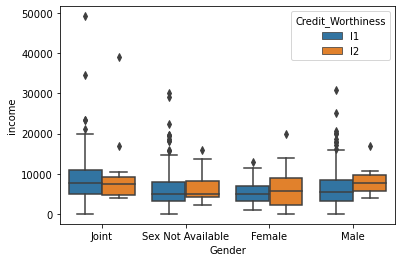

In [16]:
sns.boxplot(data=sample_loans,x='Gender' ,y='income', hue='Credit_Worthiness')

<AxesSubplot:xlabel='Gender', ylabel='income'>

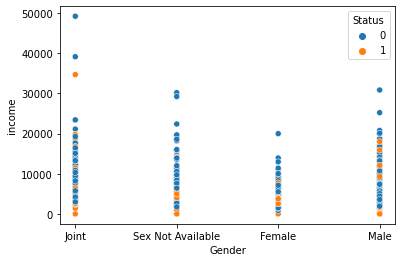

In [17]:
sns.scatterplot(data=sample_loans,x='Gender',y='income',hue='Status')

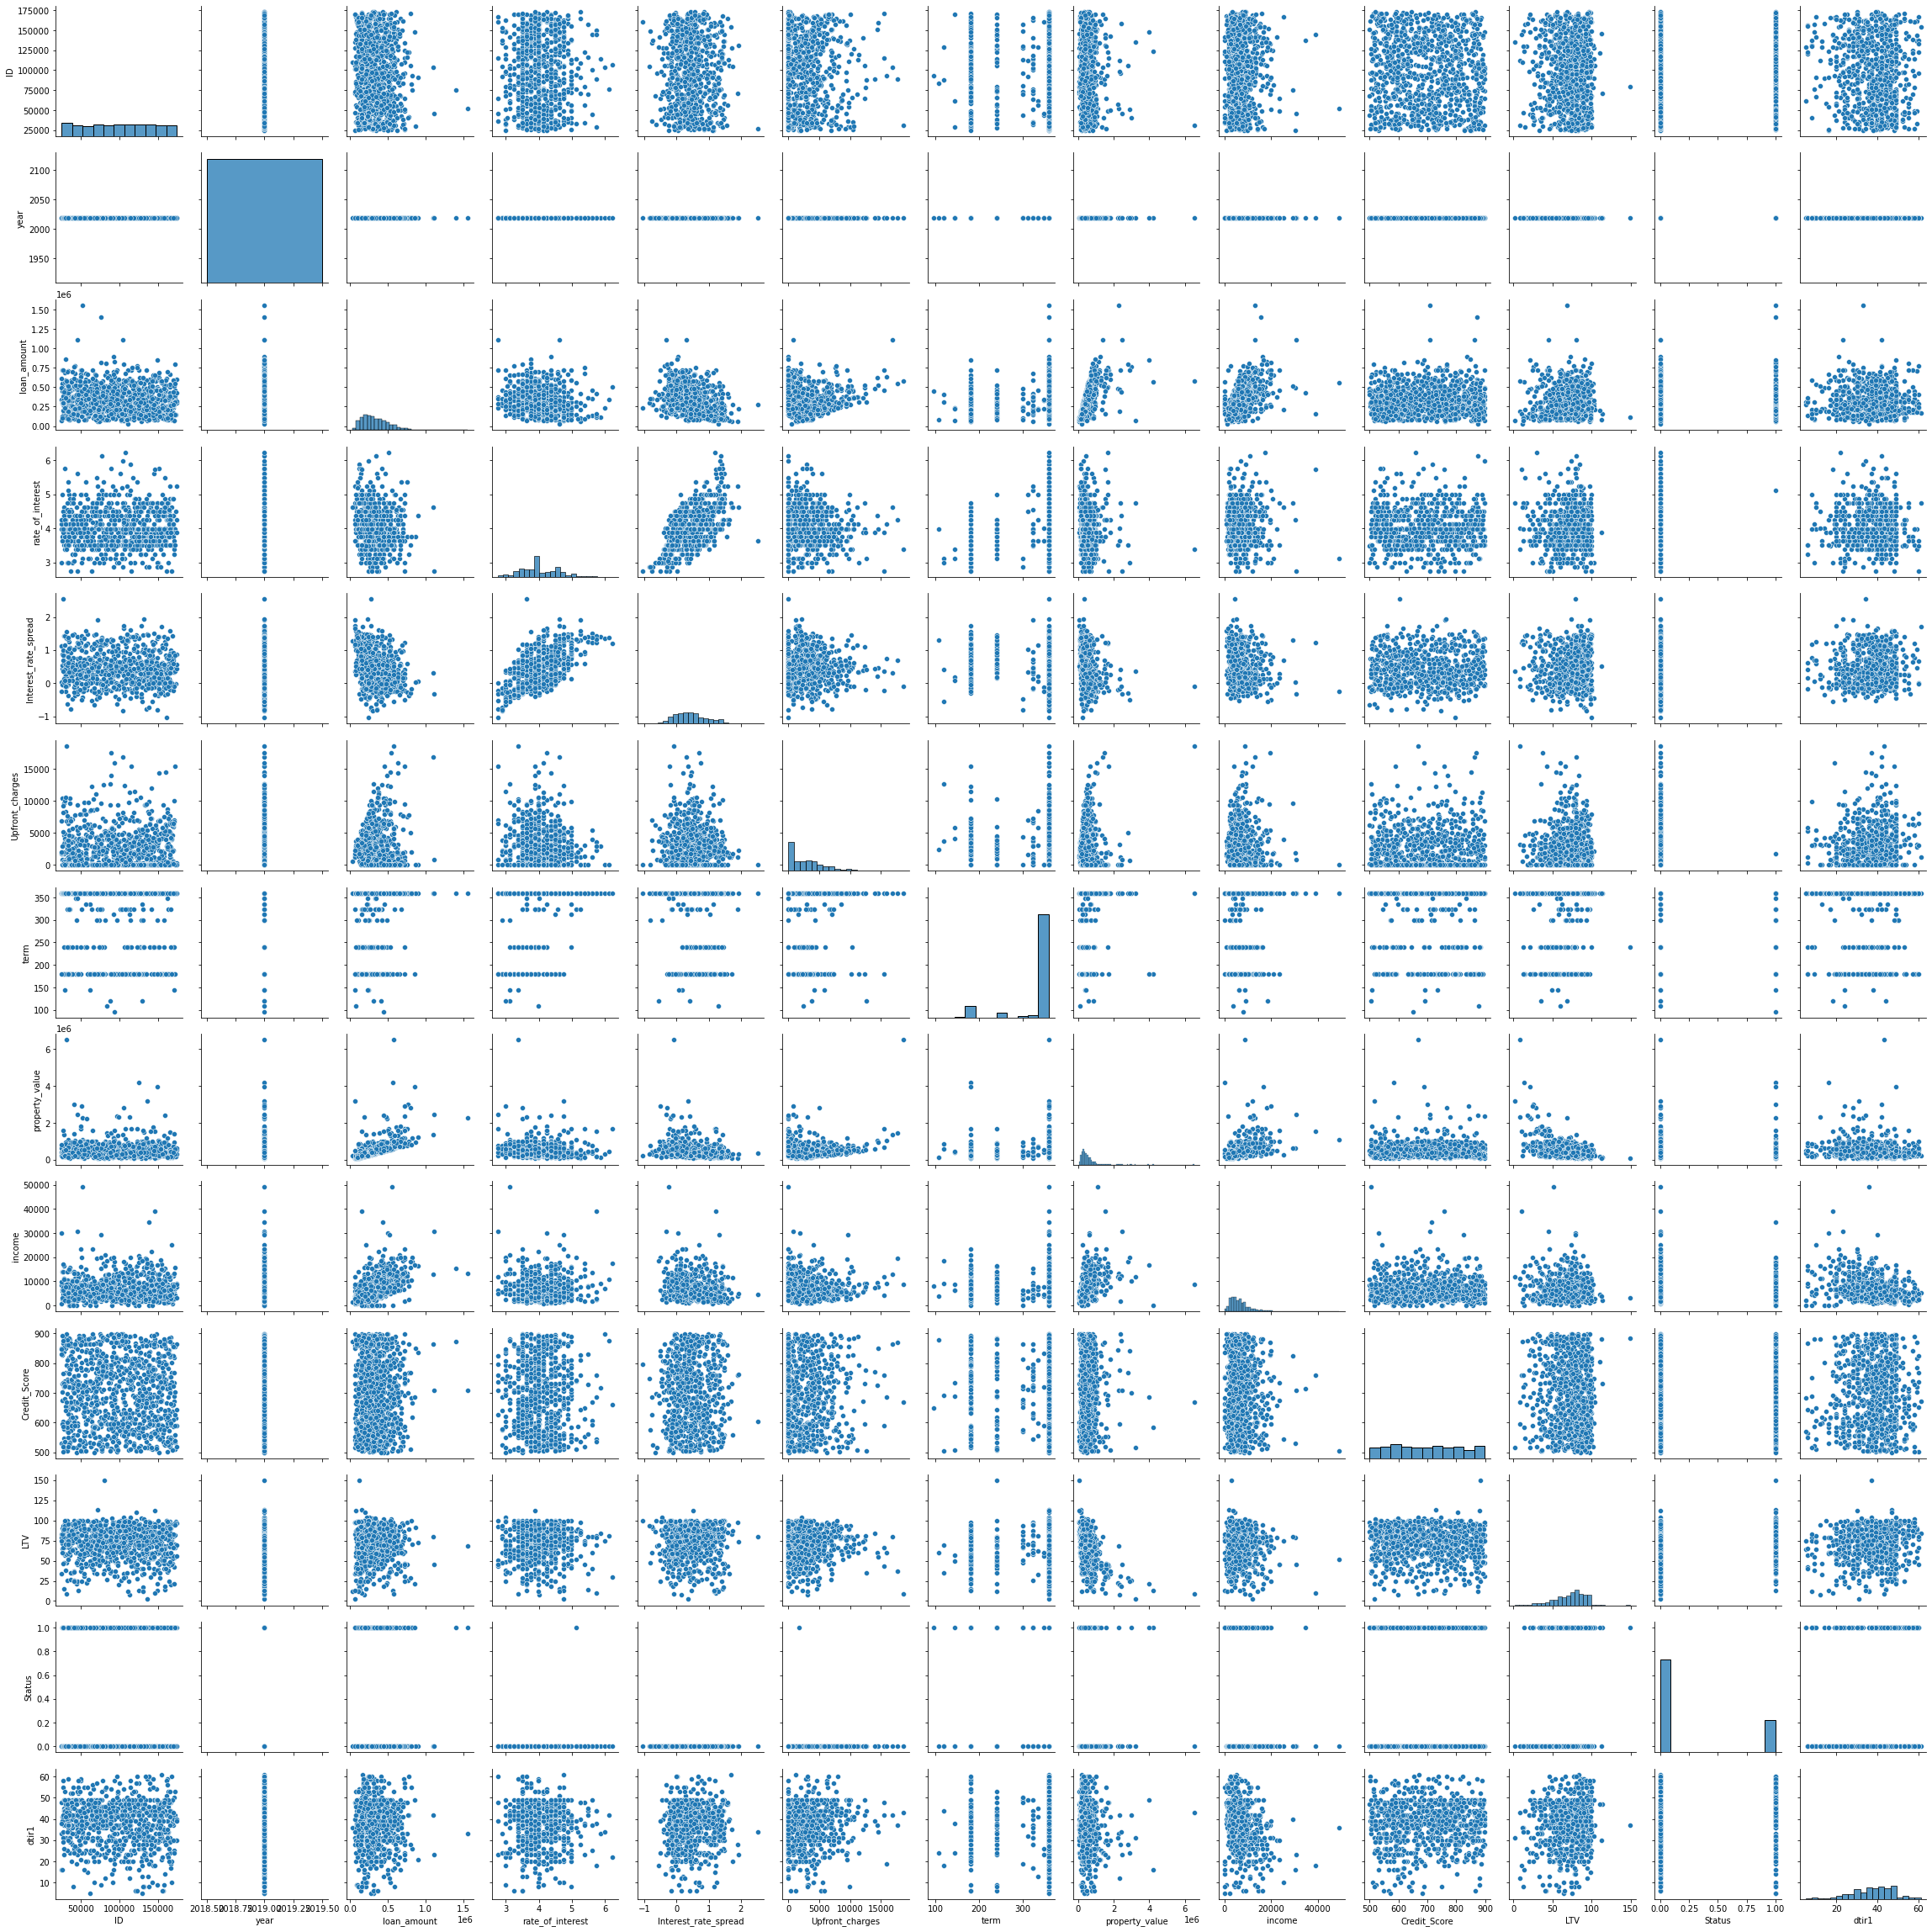

In [18]:
sns.pairplot(sample_loans)
